### Deep Neural Network (Keras)
Keras is a python deep learning library.

### Simple Linear Regression Model

In [32]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plotter

#### Plot Data Graph
This function taken in the input dataset 'x' and 'y' and plot them based on the label (0 or 1).

In [33]:
def plot_data_graph(x,y):
    plotter.plot(x[y==0, 0], x[y==0, 1], 'og', alpha=0.5, label=0)
    plotter.plot(x[y==1, 0], x[y==1, 1], 'ob', alpha=0.5, label=1)

#### Setting Data
Using sklearn library we will generate a linearly seperable data with 1000 data samples, 2 features, 0 redundant feature and 1 classter (meaning 2 centroid).

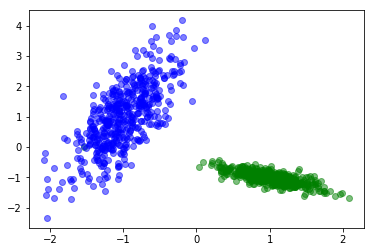

In [34]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=7, n_clusters_per_class=1)
plot_data_graph(x, y)

#### Decision Boundary
We will plot a decision boundary to figure if the data is linearly seperable.

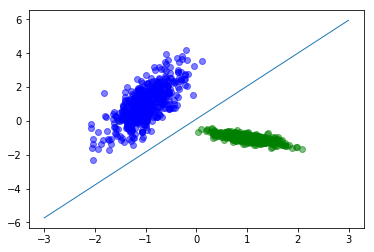

In [35]:
model = LogisticRegression()
model.fit(x, y)

plot_data_graph(x, y)

boundary_line_limits = np.array([-3, 3])
decision_boundary = -(model.coef_[0][0] * boundary_line_limits + model.intercept_[0]) / model.coef_[0][1]
plotter.plot(boundary_line_limits, decision_boundary, "", linewidth=1)

#uncomment lines below to see cofficient and intercept of a decision boundary line
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)

### Logistic Regression Model in Keras
We will train a logistic regression model in Keras (uses TenserFlow in backend) to predict class for given input. We will use Sequential API from kera that let us add layer of neural network to design a decision boundary for classifying a complex dataset.

In case of Logistic Regression model, we will not have any hidden layers because we have only two features 'x' and 'y' which require only two nodes (input and output node). The output node, based on dataset we will construct decision boundary for input data point belonging to class 0 or class 1 for our Linear Regression model.

In [36]:
import pandas as pd

#NOTE: You need to install 'Tensorflow' library for Keras.
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

#library for visualization
import seaborn as sns

#### Plot Loss and Accuracy Graph
We will take 50 epoch (each iteration) data and plot a graph.

In [37]:
def plot_loss_and_accuracy_graph(epoch_data):
    epoch_dataframe = pd.DataFrame(epoch_data.history, index=epoch_data.epoch)
    epoch_dataframe.plot(ylim=(0, max(1, epoch_dataframe.values.max())))    

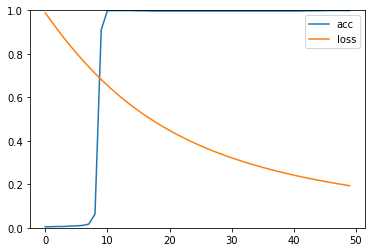

In [38]:
##dense(): constructs a fully connected neural network layer with automatic weights initialize. 
# 'unit' - number of nodes
# 'input_shape' - input dimention specification
# 'activation' - activation function to use
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

##compile(): specifies or configures the learning process for neural network model. 
# 'optimizer' - optimizer to minimise the loss function
# 'loss' - the loss function to minimize a binary classifier is 'binary_crossentropy'
# 'metrics' - for report statics, for classification problem we will use 'accuracy'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##training:
#'verbose' - prints our 'loss' and 'acc' variable. NOTE: set verbose=1 to see output at each step.
#'epochs' - number of iterations to train model
epoch_data = model.fit(x, y, verbose=0, epochs=50)
plot_loss_and_accuracy_graph(epoch_data)

We can observe that the loss is going down (close to 1) and accuracy is going up (close to 1). Hence, we have successfully trained our neural network with Keras.

#### Precision and Recall
Precision tells us what fract of data is actually correct.
Recall tell us how many predictions we made were actually correct.

In [39]:
predicted_y = model.predict_classes(x, verbose=0)
print(classification_report(y, predicted_y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       501
          1       1.00      1.00      1.00       499

avg / total       1.00      1.00      1.00      1000



#### Confusion Matrix
Confusion Matrix tells us how many classes were correctly classified vs misclassified.

In the below heatmap, the ROW(0,0) shows how many data were 0 and was also predicted as 0, similarly, ROW(0,1) shows how many data were 0 and was predicted as 1, and so on.

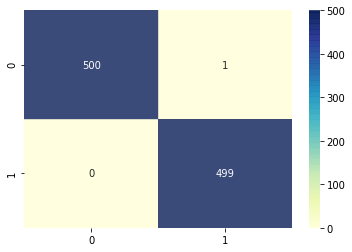

In [40]:
##sns.heatmap()
# 'annot' - bool or rectangular dataset; True means write the data value in each cell.
# 'cmap' - color map
sns.heatmap(pd.DataFrame(confusion_matrix(y, predicted_y)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

We have trained a simple linearly seperable Neural Network that can correctly classify data with 99% accuracy and minimal loss.

### Complex Dataset

The above dataset was a simple linearly seperable dataset and our logistic regression model was easily separable. However, we will now design and train logistic regression model with complex data.

In [41]:
from sklearn.datasets import make_moons, make_circles

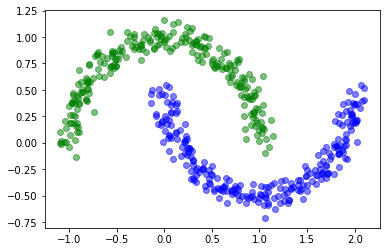

In [42]:
#Moon shaped dataset
moon_x, moon_y = make_moons(n_samples=500, noise=0.07, random_state=0)
plot_data_graph(moon_x, moon_y)

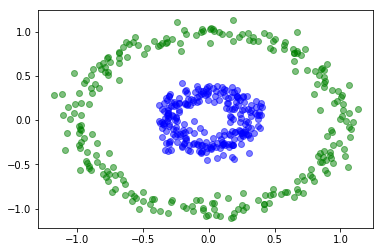

In [43]:
#Cicle shaped dataset
circle_x, circle_y = make_circles(n_samples=500, noise=0.07, factor=0.3, random_state=0)
plot_data_graph(circle_x, circle_y)

The above two dataset if trained with above logistic regression model, it will produce errornous result. So, we will need to build must deeper neural network to get the correct decision boundary to seperate/classify two classes.

### Training Complex Data

We will train moon dataset with multi-layer neural network with 'tanh' activation funcation (classifies data in the range [-1,1]) for all hidden layers and 'sigmoid' activation function for output node for binary classification.

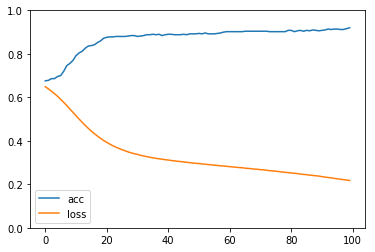

In [44]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

epoch_data = model.fit(moon_x, moon_y, verbose=0, epochs=100)

plot_loss_and_accuracy_graph(epoch_data)

#### Contour Decision Boundary Plot

In [51]:
def plot_contour_decision_boundary(model, x, y):
    step_size = 0.02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    vectored_x, vectored_y = np.meshgrid(np.arange(x_min, x_max, step_size),
                         np.arange(y_min, y_max, step_size))

    predictions = model.predict(np.c_[vectored_x.ravel(), vectored_y.ravel()])

    plot_data_graph(x,y)
    
    predictions = predictions.reshape(vectored_x.shape)
    plotter.contour(vectored_x, vectored_y, predictions, cmap=plotter.cm.Paired)

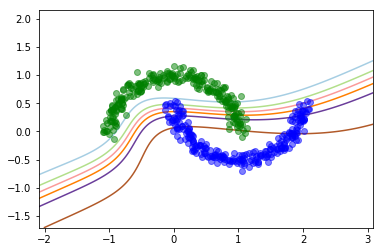

In [52]:
plot_contour_decision_boundary(model, moon_x, moon_y)

Using multi-layered neural network we can see that we could achieve good accuracy and low loss, and the decision bounday shows that the training model classifies data more accurately. However, their are some glitches that can be rectified to achieve 99% accuracy by adding more layer. Try it yourself!